<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from tqdm.notebook import tqdm
from urllib.parse import urlparse

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
data_name = urlparse(data_url).path.strip('/').split('/')[-1]

In [3]:
# Load the Stack Overflow survey dataset
df = pd.read_csv(data_name, index_col='ResponseId')

# Display the first few rows of the dataset
df.head(3)

MainBranch                 Age  \
ResponseId                                                       
1           I am a developer by profession  Under 18 years old   
2           I am a developer by profession     35-44 years old   
3           I am a developer by profession     45-54 years old   

                     Employment RemoteWork   Check  \
ResponseId                                           
1           Employed, full-time     Remote  Apples   
2           Employed, full-time     Remote  Apples   
3           Employed, full-time     Remote  Apples   

                                             CodingActivities  \
ResponseId                                                      
1                                                       Hobby   
2           Hobby;Contribute to open-source projects;Other...   
3           Hobby;Contribute to open-source projects;Other...   

                                                    EdLevel  \
ResponseId                                                    
1                                 Primary/elementary school   
2              Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
3           Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   

                                                    LearnCode  \
ResponseId                                                      
1                                      Books / Physical media   
2           Books / Physical media;Colleague;On the job tr...   
3           Books / Physical media;Colleague;On the job tr...   

                                              LearnCodeOnline  \
ResponseId                                                      
1                                                         NaN   
2           Technical documentation;Blogs;Books;Written Tu...   
3           Technical documentation;Blogs;Books;Written Tu...   

                                                      TechDoc YearsCode  \
ResponseId                                                                
1                                                         NaN       NaN   
2           API document(s) and/or SDK document(s);User gu...        20   
3           API document(s) and/or SDK document(s);User gu...        37   

           YearsCodePro                DevType OrgSize PurchaseInfluence  \
ResponseId                                                                 
1                   NaN                    NaN     NaN               NaN   
2                    17  Developer, full-stack     NaN               NaN   
3                    27   Developer Experience     NaN               NaN   

           BuyNewTool BuildvsBuy TechEndorse  \
ResponseId                                     
1                 NaN        NaN         NaN   
2                 NaN        NaN         NaN   
3                 NaN        NaN         NaN   

                                                      Country Currency  \
ResponseId                                                               
1                                    United States of America      NaN   
2           United Kingdom of Great Britain and Northern I...      NaN   
3           United Kingdom of Great Britain and Northern I...      NaN   

            CompTotal                             LanguageHaveWorkedWith  \
ResponseId                                                                 
1                 NaN                                                NaN   
2                 NaN  Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
3                 NaN                                                 C#   

                                       LanguageWantToWorkWith  \
ResponseId                                                      
1                                                         NaN   
2           Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...   
3                                                          C#   

                                              LanguageAdmire

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
missing = df.copy().loc[:,['Employment', 'JobSat', 'RemoteWork', 'YearsCodePro']].isna()
missing_stats=missing.sum().sort_values(ascending=False).to_frame(name='count')
missing_stats['Missing (%)'] = (missing_stats['count'] / len(df) * 100).round(3)
missing_stats

count  Missing (%)
JobSat        36311       55.490
YearsCodePro  13827       21.130
RemoteWork    10631       16.246
Employment        0        0.000

In [5]:
print(f"There are {missing_stats.loc['Employment', 'count']} rows, {missing_stats.loc['Employment', 'Missing (%)'].round(2)}% missing in Employment.")
print(f"There are {missing_stats.loc['JobSat', 'count']} rows, {missing_stats.loc['JobSat', 'Missing (%)'].round(2)}% missing in JobSat.")
print(f"There are {missing_stats.loc['RemoteWork', 'count']} rows, {missing_stats.loc['RemoteWork', 'Missing (%)'].round(2)}% missing in RemoteWork.")
print(f"There are {missing_stats.loc['YearsCodePro', 'count']} rows, {missing_stats.loc['YearsCodePro', 'Missing (%)'].round(2)}% missing in YearsCodePro.")

There are 0 rows, 0.0% missing in Employment.
There are 36311 rows, 55.49% missing in JobSat.
There are 10631 rows, 16.25% missing in RemoteWork.
There are 13827 rows, 21.13% missing in YearsCodePro.


In [6]:
# Impute RemoteWork with mode
df = df.copy()
mode = df['RemoteWork'].mode()[0]
df.loc[:, 'RemoteWork'] = df.loc[:, 'RemoteWork'].fillna(value=mode, axis=0)

# Check value counts again to verify successful imputation
print(f"RemoteWork missing rows: {df['RemoteWork'].isna().sum()}")
remote = df['RemoteWork'].value_counts(dropna=False).to_frame()
remote['Percentage (%)'] = (remote['count'] / len(df) * 100).round(3)
remote

RemoteWork missing rows: 0


count  Percentage (%)
RemoteWork                                                 
Hybrid (some remote, some in-person)  33646          51.417
Remote                                20831          31.834
In-person                             10960          16.749

In [7]:
# Drop all rows in JobSat that are missing
print(f"JobSat missing rows: {df['JobSat'].isna().sum()}")
df = df.copy()
df = df.dropna(subset=["JobSat"])
print(f"JobSat missing rows after dropping NaN: {df['JobSat'].isna().sum()}")

JobSat missing rows: 36311
JobSat missing rows after dropping NaN: 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [8]:
experience_map = {
    'Less than 1 year': 0.5,
    'More than 50 years': 50
}

df = df.copy()
df.loc[:, 'YearsCodePro'] = df.loc[:, 'YearsCodePro'].replace(experience_map).astype(float)

| YearsCodePro | ExperienceLevel |
| :---: | :---: |
| <5 | Beginner |
| 5-10 | Intermediate |
| 10-20 | Advanced |
| >20 | Expert |

In [9]:
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df.dtypes.loc['YearsCodePro']

dtype('float64')

In [10]:
# Impute YearsCodePro with median
df = df.copy()
median = df['YearsCodePro'].median()
df.loc[:, 'YearsCodePro'] = df.loc[:, 'YearsCodePro'].fillna(value=median, axis=0)

In [11]:
bins = [0, 5, 10, 20, float('inf')]
labels = ["Beginner", "Intermediate", "Advanced", "Expert"]

df['ExperienceLevel'] = pd.cut(
    df['YearsCodePro'],
    bins=bins,
    labels=labels,
    right=False
)

In [12]:
# Calculating Median JobSat for each range
median_sat = df.loc[:, ['ExperienceLevel', 'JobSat']].groupby('ExperienceLevel', sort=False, observed=False)['JobSat'].median()
median_sat

ExperienceLevel
Intermediate    7.0
Advanced        7.0
Expert          8.0
Beginner        7.0
Name: JobSat, dtype: float64

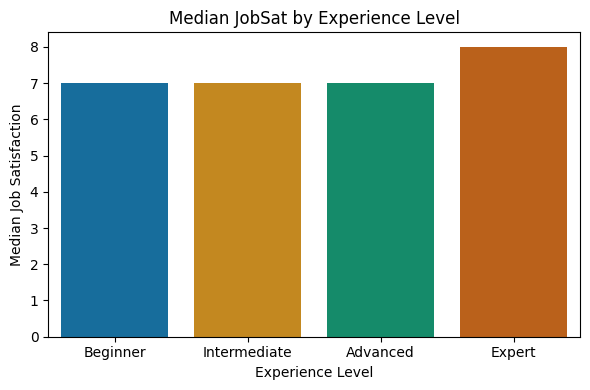

In [13]:
# Bar plot to visualise relationship
plt.figure(figsize=(6, 4))
ax = sns.barplot( 
    x=median_sat.index,
    y=median_sat.values,
    hue=median_sat.index,
    palette='colorblind',
)

ax.set_xlabel("Experience Level")
ax.set_ylabel("Median Job Satisfaction")
ax.set_title("Median JobSat by Experience Level")

plt.tight_layout()
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


In [14]:
sat_counts = df['JobSat'].value_counts().sort_index().to_frame(name='count')

In [15]:
sat_counts

count
JobSat       
0.0       311
1.0       276
2.0       772
3.0      1165
4.0      1130
5.0      1956
6.0      3751
7.0      6379
8.0      7509
9.0      3626
10.0     2251

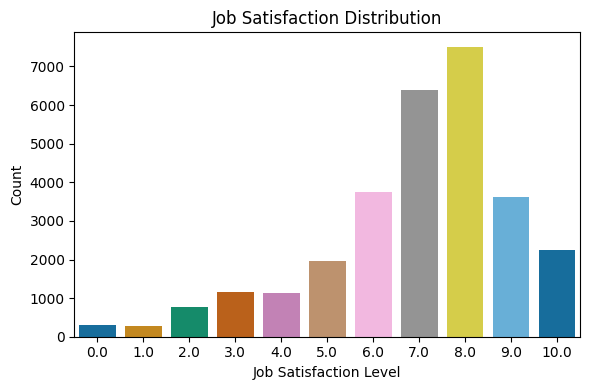

In [16]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(
    data=df,
    x='JobSat',
    hue='JobSat',
    palette='colorblind',
    legend=False
)

ax.set_xlabel("Job Satisfaction Level")
ax.set_ylabel("Count")
ax.set_title("Job Satisfaction Distribution")
# ax.grid(True)

plt.tight_layout()
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


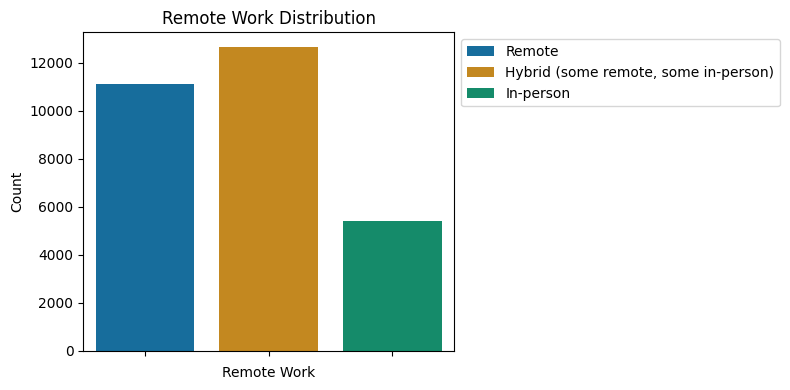

In [17]:
# Showing RemoteWork Distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df,
    x='RemoteWork',
    hue='RemoteWork',
    palette='colorblind',
    legend=True
)

ax.set_xlabel("Remote Work")
ax.set_ylabel("Count")
ax.set_title("Remote Work Distribution")
ax.set_xticklabels([])

plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [18]:
pd.crosstab(
    index=df["RemoteWork"],
    columns=df["Employment"],
)

Employment                            Employed, full-time  \
RemoteWork                                                  
Hybrid (some remote, some in-person)                10009   
In-person                                            4490   
Remote                                               8038   

Employment                            Employed, full-time;Employed, part-time  \
RemoteWork                                                                      
Hybrid (some remote, some in-person)                                       49   
In-person                                                                  18   
Remote                                                                     60   

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed  \
RemoteWork                                                                                                       
Hybrid (some remote, some in-person)                                                829                          
In-person                                                                           235                          
Remote                                                                             1227                          

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time  \
RemoteWork                                                                                                                           
Hybrid (some remote, some in-person)                                                 53                                              
In-person                                                                             9                                              
Remote                                                                               55                                              

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work  \
RemoteWork                                                                                                                                              
Hybrid (some remote, some in-person)                                                  0                                                                 
In-person                                                                             2                                                                 
Remote                                                                                0                                                                 

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time  \
RemoteWork                                                                                                                                                                  
Hybrid (some remote, some in-person)                                                  0                                                                                     
In-person                                                                             0                                                                                     
Remote                                                                                1                                                                                     

Employment                            Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time  \
RemoteWork                                                                                                                          
Hybrid (some remote, some in-person)                                                 44                                             
In-person      

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [19]:
# Standardising country names
import pycountry as pc
import country_converter as coco

country_counts=df['Country'].value_counts().to_frame(name="Count").sort_index()

standardised_names={}
for country in country_counts.index:
    short_name=''
    try:
        if country == 'Nomadic':
            short_name=country
        else:
            short_name=pc.countries.lookup(country).name
    except:
        short_name=coco.convert(names=[country], to='name_short')

    # print(f"O: {country},\tS: {short_name}") 
    standardised_names[country] = short_name

df = df.copy()
df['Country_Standardised'] = df['Country'].map(standardised_names)
df['Country_Standardised'] = df['Country_Standardised'].replace({
    "Korea, Republic of": "South Korea",
    "Korea, Democratic People's Republic of": "North Korea"
})
country_counts_std=df['Country_Standardised'].value_counts().to_frame(name="Count").sort_index()

In [26]:
# Assigning continent to each entry
df['Continent'] = coco.convert(names=df['Country'], to='continent')
df.loc[df['Country'] == 'Nomadic', 'Continent'] = 'Nomadic'
df.loc[:,'Continent'].value_counts()

Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex
Nomadic not found in regex


Continent
Europe     14386
America     8238
Asia        4981
Africa       756
Oceania      754
Nomadic       11
Name: count, dtype: int64

In [27]:
# Filtering data by country
df['Language_list'] = df['LanguageHaveWorkedWith'].str.split(';')
df_lang = df.explode('Language_list')
df_lang['Language_list'] = df_lang['Language_list'].str.strip()


In [28]:
df_lang['Language_list']

ResponseId
11                    JavaScript
11                        Python
11                          Ruby
13       Bash/Shell (all shells)
13                            C#
13                    JavaScript
13                    PowerShell
13                           VBA
16                            C#
16                      HTML/CSS
16                    JavaScript
16                    PowerShell
16                           SQL
16                    TypeScript
16                           VBA
16           Visual Basic (.Net)
19                            C#
19                      HTML/CSS
19                    JavaScript
19                           PHP
19                        Python
19                           SQL
21       Bash/Shell (all shells)
21                      HTML/CSS
21                           PHP
21                        Python
21                           SQL
21                           VBA
23       Bash/Shell (all shells)
23                            C#

In [33]:
lang_counts = (
    df_lang.groupby(['Continent', 'Language_list'])
           .size()
           .reset_index(name='Count')
).sort_values(['Continent', 'Count'], ascending=[True, False]).groupby('Continent').head(10)


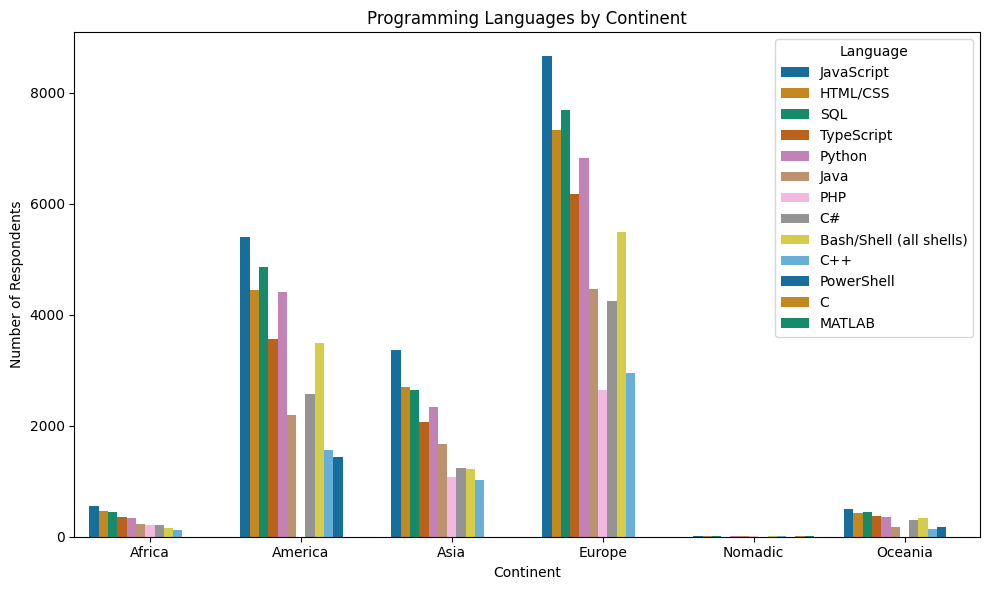

In [37]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=lang_counts,
    x='Continent', y='Count',
    hue='Language_list',   # each language gets its own colour
    palette='colorblind'
)

plt.title('Programming Languages by Continent')
plt.ylabel('Number of Respondents')
plt.xlabel('Continent')
plt.legend(title='Language', loc='best')
plt.tight_layout()
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


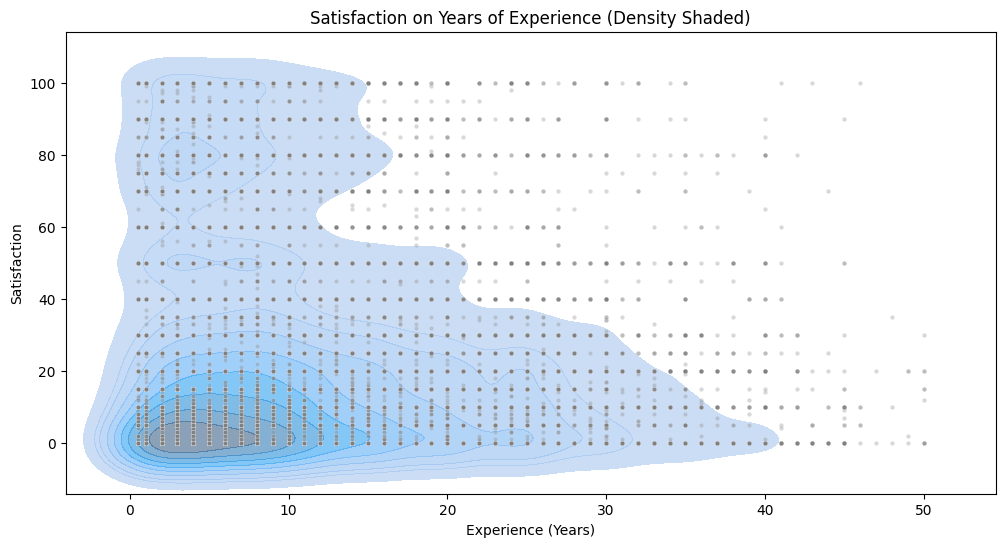

In [71]:
plt.figure(figsize=(12,6))

sns.kdeplot(data=df,x='YearsCodePro',y='JobSatPoints_1',fill=True,thresh=0.05,alpha=0.6)
sns.scatterplot(data=df, x='YearsCodePro', y='JobSatPoints_1', color='grey', alpha=0.3, s=10)

plt.xlabel("Experience (Years)")
plt.ylabel("Satisfaction")
plt.title("Satisfaction on Years of Experience (Density Shaded)")

plt.savefig("Lab 12 - Step 8")
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [72]:
pd.crosstab(
    index=df["EdLevel"],
    columns=df["Employment"],
)

Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                 674   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      10497   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                    6731   
Primary/elementary school                                            98   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     1147   
Secondary school (e.g. American high school, Ge...                  891   
Some college/university study without earning a...                 2285   
Something else                                                      214   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                                                       7   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                             58   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                          34   
Primary/elementary school                                                                 0   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                            5   
Secondary school (e.g. American high school, Ge...                                        8   
Some college/university study without earning a...                                       14   
Something else                                                                            1   

Employment                                          Employed, full-time;Independent contractor, freelancer, or self-employed  \
EdLevel                                                                                                                        
Associate degree (A.A., A.S., etc.)                                                                75                          
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                                      961                          
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                                   635                          
Primary/elementary school                                                                          14                          
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                                    103                          
Secondary school (e.g. American high school, Ge...                                                128                          
Some college/university study without earning a...                                                345                          
Something else                                                                                     30                          

Employment                                          Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time  \
EdLevel                                                                                                                                            
Associate degree (A.A., A.S., etc.)                                                                 7                                              
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                                       55                                              
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                                    30                                              
Primary/elementary school                                                                           1                                              
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                                      8                            

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [73]:
df.to_csv("survey-data_lab-12-cleaned.csv")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
